# Midterm Assignment - Principal Component Analysis

## Packages used

Here are the packages used for this assignment:

- numpy: for mathematical operations and multidimensional array manipulation
- OpenCV: for basic image utilities, e.g. resizing images, reading images from files, converting between colour spaces
- sklearn: PCA used for computation of principal components
- matplotlib: for displaying images and plots
- mpl_toolkits: ImageGrid() function used to display principal components in a grid

In [ ]:
import numpy as np
import cv2

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Original Image

Below is a plot of the original image.

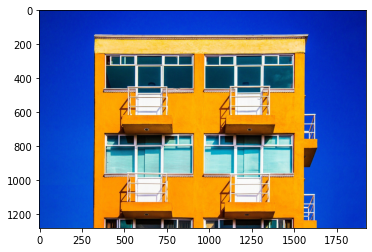

In [ ]:
img = cv2.imread('/content/drive/My Drive/CV midterm/building.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

## Function Definitions

This section contains the definitions of the functions used to compute the principal components.

### Patchifying the Image

This function splits the image into a set of vectors for each n \* n patch.

Here the original image is $1920 * 1280$ pixels so in total there are $(1920  16) * (1280 / 16) = 120 * 80 = 9600$ vectors of $3 * 16 * 16 = 768$.

In [ ]:
# split image into 3*n*n patches
def patchify_image(image, n):
  h = image.shape[0]
  w = image.shape[1]
  c = image.shape[2]
  patches = image.reshape(int((h / n) * (w / n)), c * n * n)
  return patches

### Centering the Patches

Each patch is centered to the mean by subtracting the mean patch.

In [ ]:
# center each 3*n*n patch to the mean
def mean_center_patches(patches):
  centered = np.zeros(patches.shape)
  mean = np.mean(patches, axis=0)
  for patch in range(patches.shape[0]):
    centered[patch] = np.subtract(patches[patch], mean)
  return centered

### Computing the Covariance Matrix

This function uses numpy to compute the covariance matrix of the entire image, using the centered patch vectors.

In [ ]:
# calculate covariance matrix for image
def calculate_covariance_matrix(patches):
  return np.cov(patches.T)

### Computing the Principal Components

The function get_k_principal_components() computes the eigenvalues and eigenvectors of the covariance matrix, then sorts the eigenvectors in descending order by the magnitude of its eigenvalue, and finally returns the first $k$ eigenvectors.

The function sk_get_k_principal_components() uses scikit learn to compute the principal components for comparison.

In [ ]:
# get k eigenvectors associated with highest eigenvalues
def get_k_principal_components(covariance_matrix, k):
  eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
  index = eig_vals.argsort()[-k:][::-1]
  return eig_vecs[:,index].T

def sk_get_k_principal_components(patches, k):
  pca = PCA(n_components=k)
  pca.fit(patches)
  return pca.components_

### Reconstructing the Original Image

First each patch is compressed into its 'alphas', where for each patch, each 'alpha' is a scalar value equal to the dot product of the centered patch and one of the principal components. In other words, each patch can be represented by a vector of k 'alphas' where k is the number of components.

Then the original patch is reconstructed from the compressed version. For each patch, the dot product of the patches 'alphas' and the principal components is computed, and finally the vector of patches is reshaped into the dimensions of the original image for displaying.

In [ ]:
# reconstruct image from components
def reconstruct_image(patches, components):
  mean_patch = np.mean(patches, axis=0)
  reconstructed_patches = np.zeros(patches.shape)
  for i, p in enumerate(patches):
    alphas = np.zeros(len(components))
    for j, c in enumerate(components):
      alphas[j] = np.dot(p - mean_patch, c)
    reconstructed_patches[i] = np.dot(alphas, components)
  #return np.array(reconstructed_patches.reshape((1280, 1920, 3)), dtype='uint8')
  return reconstructed_patches.reshape((1280, 1920, 3))

## Question 1 - Computing for $k = 10$ and $k = 100$

Here the PCA is carried out.

The reconstructed images are plotted at the bottom, the top two with $k = 10$ and the bottom two with $k = 100$. On the left the components were computed using the functions defined above and on the right they were found using sklearn.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


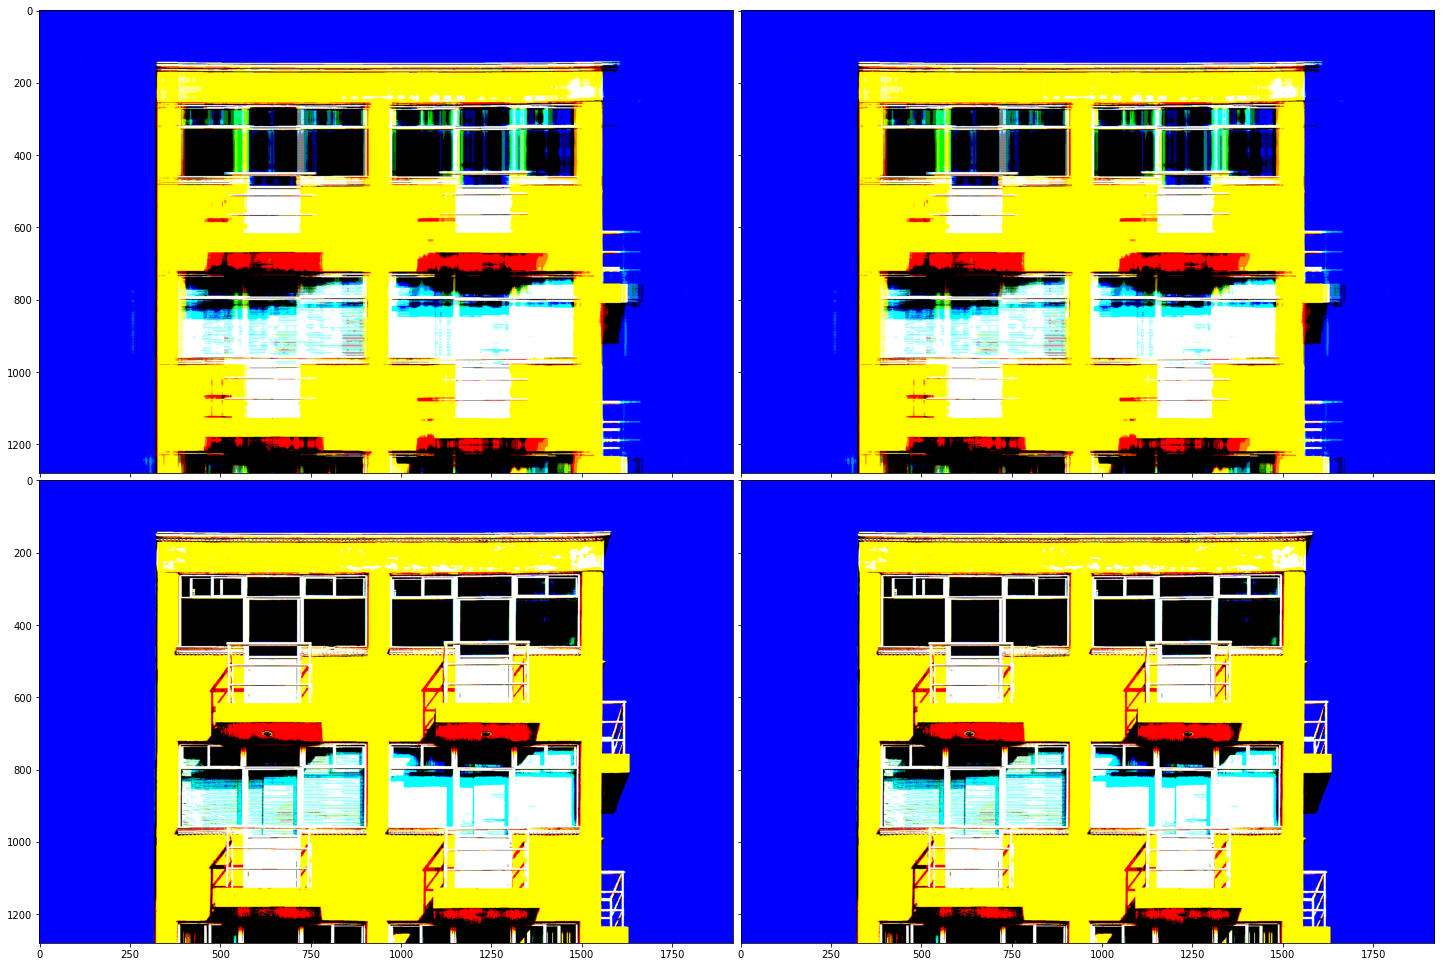

In [66]:
images = []
k_range = [10, 100]
n = 16

for k in k_range:
  patches = patchify_image(img, n)

  # get components manually
  cent_patches = mean_center_patches(patches)
  cov = calculate_covariance_matrix(cent_patches)
  components = get_k_principal_components(cov, k)
  reconstructed_img = reconstruct_image(patches, components)
  cv2.imwrite('/content/drive/My Drive/CV midterm/images/r_{}.jpg'.format(k), cv2.cvtColor(reconstructed_img.astype('float32'), cv2.COLOR_RGB2BGRA))
  images.append(reconstructed_img)

  # get components with sklearn
  sk_components = sk_get_k_principal_components(patches, k)
  sk_reconstructed_img = reconstruct_image(patches, sk_components)
  cv2.imwrite('/content/drive/My Drive/CV midterm/images/sk_r_{}.jpg'.format(k), cv2.cvtColor(sk_reconstructed_img.astype('float32'), cv2.COLOR_RGB2BGRA))
  images.append(sk_reconstructed_img)

fig = plt.figure(figsize=(25., 25.))
grid = ImageGrid(fig, 111, nrows_ncols=(2, 2), axes_pad=0.1)
for ax, image in zip(grid, images):
  ax.imshow(image)
plt.show()

## Question 2 - Plotting the components

Here the 100 most significant principal components are plotted in a grid.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

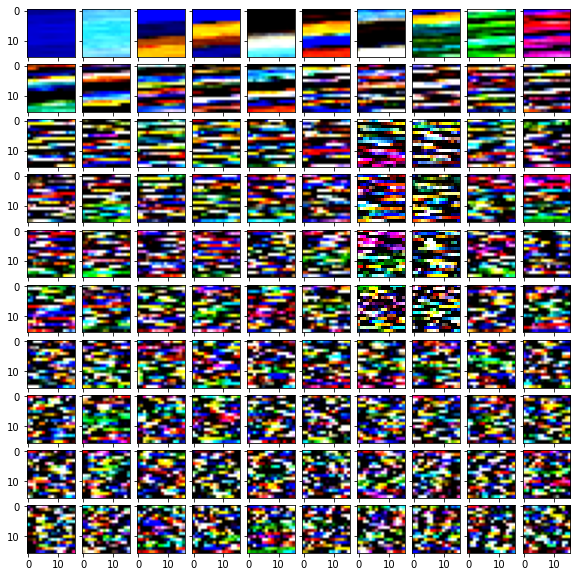

In [65]:
def plot_k_principal_components(components):
  fig = plt.figure(figsize=(10., 10.))
  grid = ImageGrid(fig, 111, nrows_ncols=(int(len(components) / 10), 10), axes_pad=0.1)
  # scale components because too faint otherwise
  components = np.multiply(components, 30)
  for i, (ax, component) in enumerate(zip(grid, components)):
    img = component.reshape((16, 16, 3))
    ax.imshow(img)
    cv2.imwrite('/content/drive/My Drive/CV midterm/images/component_{}.jpg'.format(i + 1), cv2.cvtColor(img.astype('uint8') * 255, cv2.COLOR_RGB2BGR))
  plt.show()

patches = patchify_image(img, n=16)
cent_patches = mean_center_patches(patches)
cov = calculate_covariance_matrix(cent_patches)
components = get_k_principal_components(cov, k=100)
plot_k_principal_components(components)

## Question 3 - Selecting $k$

As seen in the reconstructed images from Question 1, the visual fidelity of the images with $k = 100$ is much higher than those with $k = 10$. This is because as $k$ increases, the total variance that the selected components account for approaches the total variance in the entire dataset.

However, as more components are added, their 'significance' to the overall variance decreases and so a value of $k$ can be selected such that the majority of the overall variance can be accounted for, without the performance cost of computing all of the possible components.

Since the eigenvalues of the covariance matrix are themselves measures of the variance in the datset, they can be plotted in order and can use an 'elbow' in the graph to select a value of $k$. Based on the graph below, it can be seen that increasing $k$ beyond 20 or so yields diminishing returns.


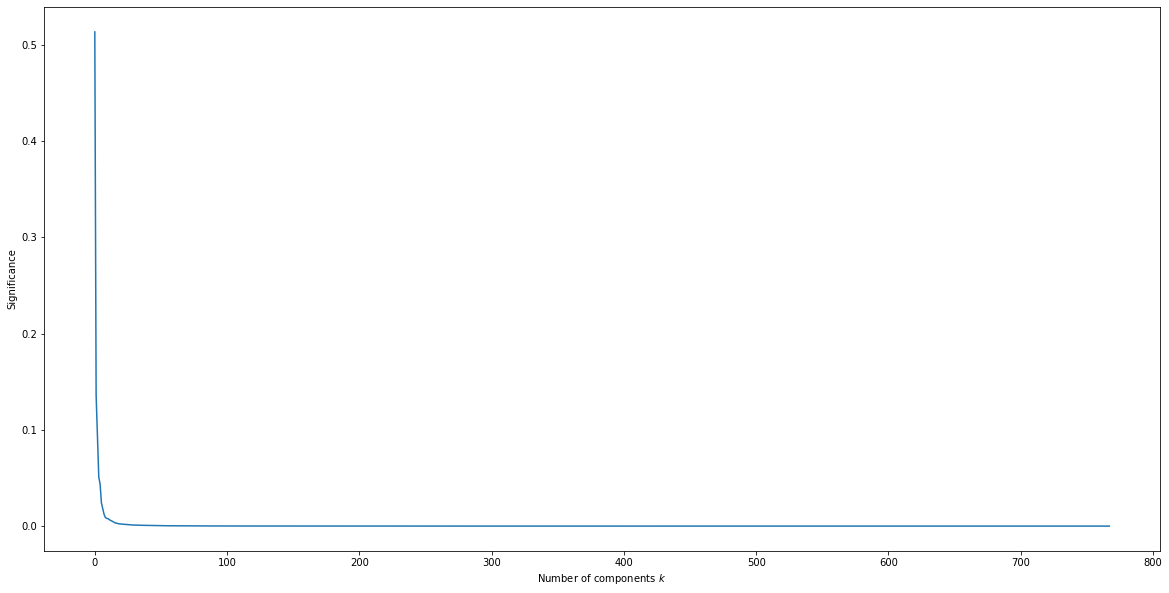

In [ ]:
patches = patchify_image(img, 16)
cent_patches = mean_center_patches(patches)
cov = calculate_covariance_matrix(cent_patches)
eig_vals, _ = np.linalg.eig(cov)

fig = plt.figure(figsize=(20., 10.))
plt.plot(np.abs(eig_vals) / np.sum(eig_vals))
plt.xlabel('Number of components $k$')
plt.ylabel('Significance') 
plt.show()

## Question 4 - Comparison of Values of $k$

Below are plotted the reconstructed images for $k = 10$, $k = 20$, and $k = 100$. The image for $k = 10$ is quite distorted, but overall the other two are very similar. There is some detail for $k = 100$ which is not present in $k = 20$, but it is still a big improvement over $k = 10$.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


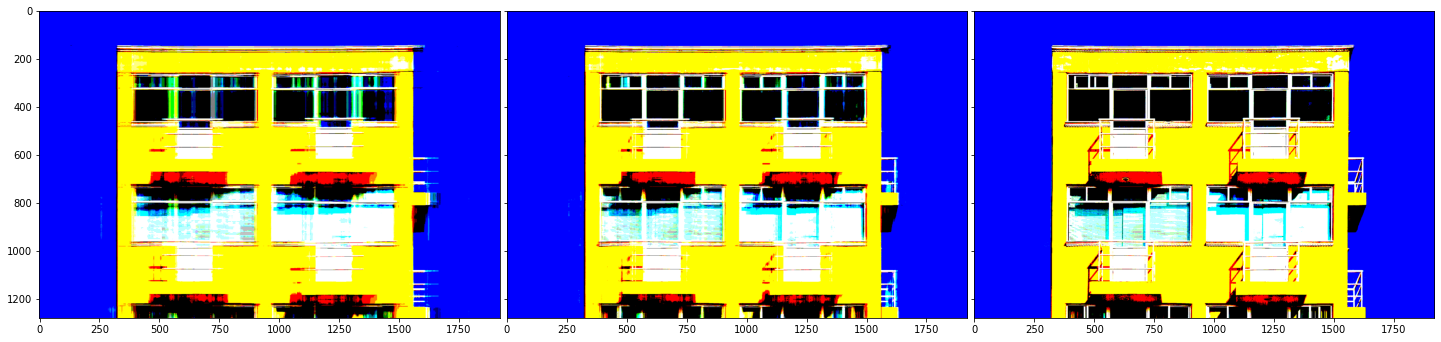

In [ ]:
images = []
k_range = [10, 20, 100]
n = 16

for k in k_range:
  patches = patchify_image(img, n)
  cent_patches = mean_center_patches(patches)
  cov = calculate_covariance_matrix(cent_patches)
  components = get_k_principal_components(cov, k)
  reconstructed_img = reconstruct_image(patches, components)
  images.append(reconstructed_img)

fig = plt.figure(figsize=(25., 25.))
grid = ImageGrid(fig, 111, nrows_ncols=(1, 3), axes_pad=0.1)
for ax, image in zip(grid, images):
  ax.imshow(image)
plt.show()